# 逻辑损失与成本函数

> [Machine Learning | Coursera](https://www.coursera.org/specializations/machine-learning-introduction)

## Logistic Loss

### Limitations of MSE in Logistic Regression

回顾在[线性回归中学习的成本函数公式](../ml/cost-func.md)，其采用的是**均方误差公式 (MSE, *Mean Squared Error Formula*)**:

$$
J(\overrightarrow{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)})^2
$$

其中

$$
f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) = \overrightarrow{w} \cdot \overrightarrow{x}^{(i)} + b
$$

在一元线性回归模型中，成本函数的可视化就是如同一个碗状的曲面:

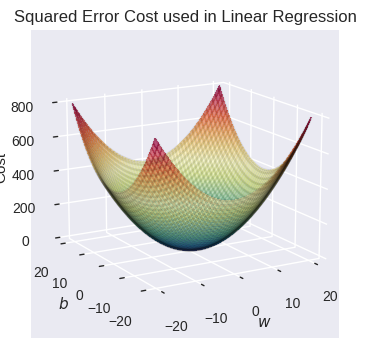

In [1]:
import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
from src.plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from src.plt_logistic_loss import soup_bowl, plt_logistic_squared_error
plt.style.use('seaborn-v0_8')

soup_bowl()

在学习[成本函数的概念时](../ml/cost-func.md)，我们也提到**需要根据不同的场景选择不同的成本函数**。假设我们使用均方误差函数来拟合逻辑回归模型，则成本函数将如下所示:

$$
J(\overrightarrow{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{\overrightarrow{w}, b}(\overrightarrow{x}^{(i)}) - y^{(i)})^2
$$

其中

$$
\begin{align}
    f_{\overrightarrow{w}, b}(x^{(i)}) & = \mathcal{sigmoid}(\overrightarrow{w} \cdot \overrightarrow{x}^{(i)} + b) \\
    & = \frac{1}{1 + e^{-(\overrightarrow{w} \cdot \overrightarrow{x}^{(i)} + b)}}
\end{align}
$$

可视化:

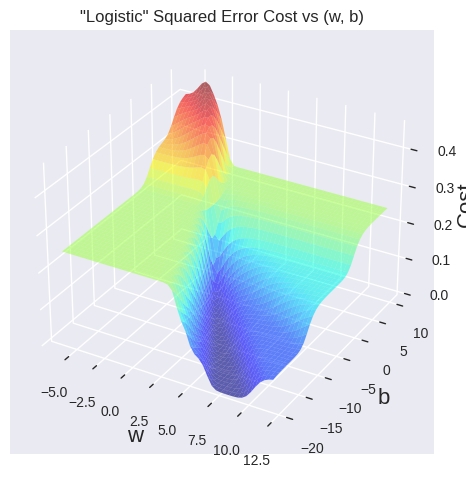

In [2]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

可以看出, 使用均方误差函数拟合逻辑回归模型时, 成本函数是一个非凸函数, 存在多个局部最小值, 因此使用梯度下降法时可能会陷入局部最小值, 导致模型效果不佳.

因此, 我们需要使用其他成本函数来拟合逻辑回归模型.

### Logistic Loss Function

#### Definition

我们将逻辑损失函数定义为**单个数据点的成本**, 记作 $\mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)})$:

\begin{equation}
  \mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \ln\left(f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) & (y^{(i)}=1) \\
    - \ln \left( 1 - f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) & (y^{(i)}=0)
  \end{cases}
\end{equation}

> **Note**:
>
> - <strong>损失 (*Loss*)</strong>是衡量<mark>单个样本</mark>的预测结果与真实结果之间差异的指标
>
> - <strong>成本 (*Cost*)</strong>是衡量<mark>训练集</mark>上损失的一个指标

该损失函数的显著特征在于采用两条独立曲线：一条适用于目标值为零的情况（$y=0$），另一条适用于目标值为一的情况（$y=1$）。这两条曲线共同构成了损失函数的典型特性——当预测值与目标值一致时函数值为零，而预测值与目标值出现偏差时函数值迅速增大。观察下方曲线:


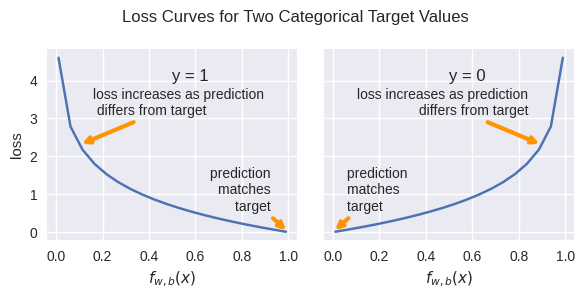

In [3]:
plt_two_logistic_loss_curves()

损失函数也可以写成单个表达式:

$$
\mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)}) = (-y^{(i)}) \ln \left(f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \ln \left( 1 - f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right)
$$

当 $y^{(i)} = 0$ 时，第一项系数为 $0$，消去:

$$
\begin{align}
    \mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)}) & = -(0) \ln \left(f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) - \left( 1 - 0 \right) \ln \left( 1 - f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) \\
    & = - \ln \left( 1 - f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right)
\end{align}
$$

当 $y^{(i)} = 1$ 时，第二项系数为 $0$，消去:

$$
\begin{align}
    \mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)}) & = -(1) \ln \left(f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) - \left( 1 - 1 \right) \ln \left( 1 - f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) \\
    & = - \ln \left(f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right)
\end{align}
$$

#### 3D Visualization


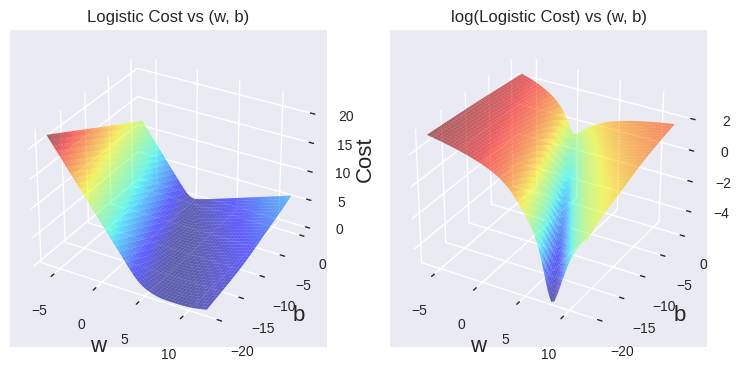

In [4]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)


## Cost Function of Logistic Regression

### Mathematical Definition

针对逻辑回归模型，我们采用如下形式定义其成本函数:

$$
J(\overrightarrow{w}, b) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)})
$$

其中

- $m$ 是训练集中的样本数量

- $loss(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)})$ 是单个数据点的损失函数:

$$
\mathcal{loss}(f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}), y^{(i)}) = (-y^{(i)}) \ln \left(f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \ln \left( 1 - f_{\overrightarrow{w},b}\left( \overrightarrow{x}^{(i)} \right) \right)
$$

- $f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)})$ 是逻辑回归模型的预测值:

$$
\begin{align}
    f_{\overrightarrow{w},b}(\overrightarrow{x}^{(i)}) & = \mathcal{sigmoid}(\overrightarrow{w} \cdot \overrightarrow{x}^{(i)} + b) \\
    & = \frac{1}{1 + e^{-(\overrightarrow{w} \cdot \overrightarrow{x}^{(i)} + b)}}
\end{align}
$$

### Code Implementation

采用遍历的方式计算每个样本的损失函数，并求和取平均值:

In [5]:
def compute_cost_logistic(X, y, w, b):
    """计算逻辑回归模型的成本函数

    Args:
      X (ndarray (m,n)): 数据集, 包含 m 个样本, 每个样本有 n 个特征
      y (ndarray (m,)) : 目标值
      w (ndarray (n,)) : 模型参数
      b (scalar)       : 模型参数
      
    Returns:
      cost (scalar): 成本
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost
